Please download the dataset from the below url

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [37]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [3]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/cricket/Train'
valid_path = '/content/drive/MyDrive/cricket/Test'


In [4]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)




94773248/94765736 [==============================] - 1s 0us/step


In [5]:
# don't train existing weights
for layer in resnet.layers:
    layer.trainable = False

In [6]:
# useful for getting number of output classes
folders = glob('/content/drive/MyDrive/cricket/Train/*')
folders

['/content/drive/MyDrive/cricket/Train/pitch',
 '/content/drive/MyDrive/cricket/Train/field',
 '/content/drive/MyDrive/cricket/Train/ball',
 '/content/drive/MyDrive/cricket/Train/score',
 '/content/drive/MyDrive/cricket/Train/wicket',
 '/content/drive/MyDrive/cricket/Train/umpire',
 '/content/drive/MyDrive/cricket/Train/bat',
 '/content/drive/MyDrive/cricket/Train/groundstand']

In [7]:
# our layers - you can add more if you want
x = Flatten()(resnet.output)

In [8]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [9]:

# view the structure of the model
model.summary()


Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [10]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [11]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [14]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/cricket/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 64 ,
                                                 class_mode = 'categorical')

Found 6071 images belonging to 8 classes.


In [15]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/cricket/Test',
                                            target_size = (224, 224),
                                            batch_size = 64,
                                            class_mode = 'categorical')

Found 1090 images belonging to 8 classes.


In [43]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=100,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
95/95 [==============================] - 160s 2s/step - loss: 0.5935 - accuracy: 0.8126 - val_loss: 0.5428 - val_accuracy: 0.8404
Epoch 2/100
95/95 [==============================] - 158s 2s/step - loss: 0.6359 - accuracy: 0.8063 - val_loss: 0.6333 - val_accuracy: 0.8376
Epoch 3/100
95/95 [==============================] - 157s 2s/step - loss: 0.5598 - accuracy: 0.8182 - val_loss: 0.5048 - val_accuracy: 0.8394
Epoch 4/100
95/95 [==============================] - 156s 2s/step - loss: 0.6643 - accuracy: 0.7911 - val_loss: 0.5193 - val_accuracy: 0.8431
Epoch 5/100
95/95 [==============================] - 156s 2s/step - loss: 0.6290 - accuracy: 0.8030 - val_loss: 0.4754 - val_accuracy: 0.8706
Epoch 6/100
95/95 [==============================] - 156s 2s/step - loss: 0.6002 - accuracy: 0.8121 - val_loss: 0.5470 - val_accuracy: 0.8385
Epoch 7/100
95/95 [==============================] - 156s 2s/step - loss: 0.6564 - accuracy: 0.7977 - val_loss: 0.6792 - val_accuracy: 0.8257
Epoch 

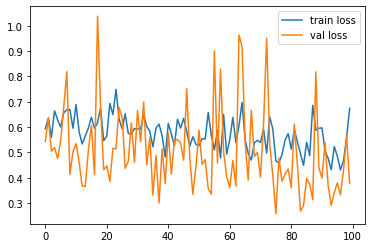

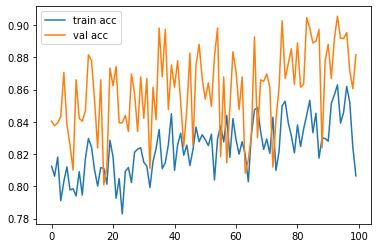

<Figure size 432x288 with 0 Axes>

In [44]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [46]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('Model_Resnet50.hdf5')

In [47]:

y_pred = model.predict(test_set)


In [48]:
y_pred

array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 1.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [9.5591509e-01, 3.9069196e-03, 1.5051984e-02, ..., 0.0000000e+00,
        9.4306776e-09, 2.5058484e-02],
       [3.5452268e-09, 2.3177464e-07, 9.9939442e-01, ..., 0.0000000e+00,
        5.9790142e-09, 2.1373718e-05],
       ...,
       [2.1639115e-08, 9.4129486e-05, 1.4388356e-05, ..., 0.0000000e+00,
        1.6140337e-13, 9.9784172e-01],
       [9.8769586e-12, 2.4623803e-08, 9.9998856e-01, ..., 0.0000000e+00,
        5.6972530e-12, 5.0496301e-06],
       [4.0594276e-17, 3.9357509e-08, 8.6105040e-11, ..., 9.4824414e-25,
        3.2930116e-16, 1.9056701e-09]], dtype=float32)

In [49]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [50]:
y_pred

array([5, 0, 2, ..., 7, 2, 4])

In [51]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [52]:
model=load_model('Model_Resnet50.hdf5')

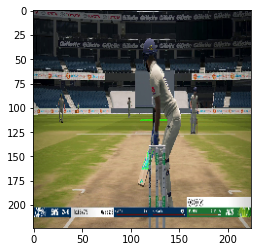

In [53]:
img=image.load_img('/content/drive/MyDrive/cricket/Test/bat/frame15980.jpg',target_size=(224,224))
plt.imshow(img)

In [54]:
image = image.img_to_array(img)

image = image/255.  

image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
model.predict(image)




array([[3.3646890e-09, 9.9979526e-01, 2.2304190e-05, 1.5597942e-07,
        1.8100429e-04, 2.3581797e-27, 1.6814228e-09, 1.2903155e-06]],
      dtype=float32)

In [55]:
a=np.argmax(model.predict(image),axis=1)
a

array([1])